In [1]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt

In [2]:
def plot_image(images):        
    n=131
    plt.figure(figsize=(50,50))
    for img in images:
        plt.subplot(n)
        plt.imshow(img)
        plt.axis('off')
        n+=1
    plt.show()

In [3]:
def laplacian_filter(img,M):    
    imgOut=np.ndarray(shape=((img.shape)), dtype='uint8')
    for row in range(1, img.shape[0] - 1):
        for col in range(1, img.shape[1] - 1):
            value = M * img[(row - 1):(row + 2), (col - 1):(col + 2)]
            imgOut[row, col] = min(255, max(0, value.sum ()))
            
    return imgOut

Sharpening with laplacian filter

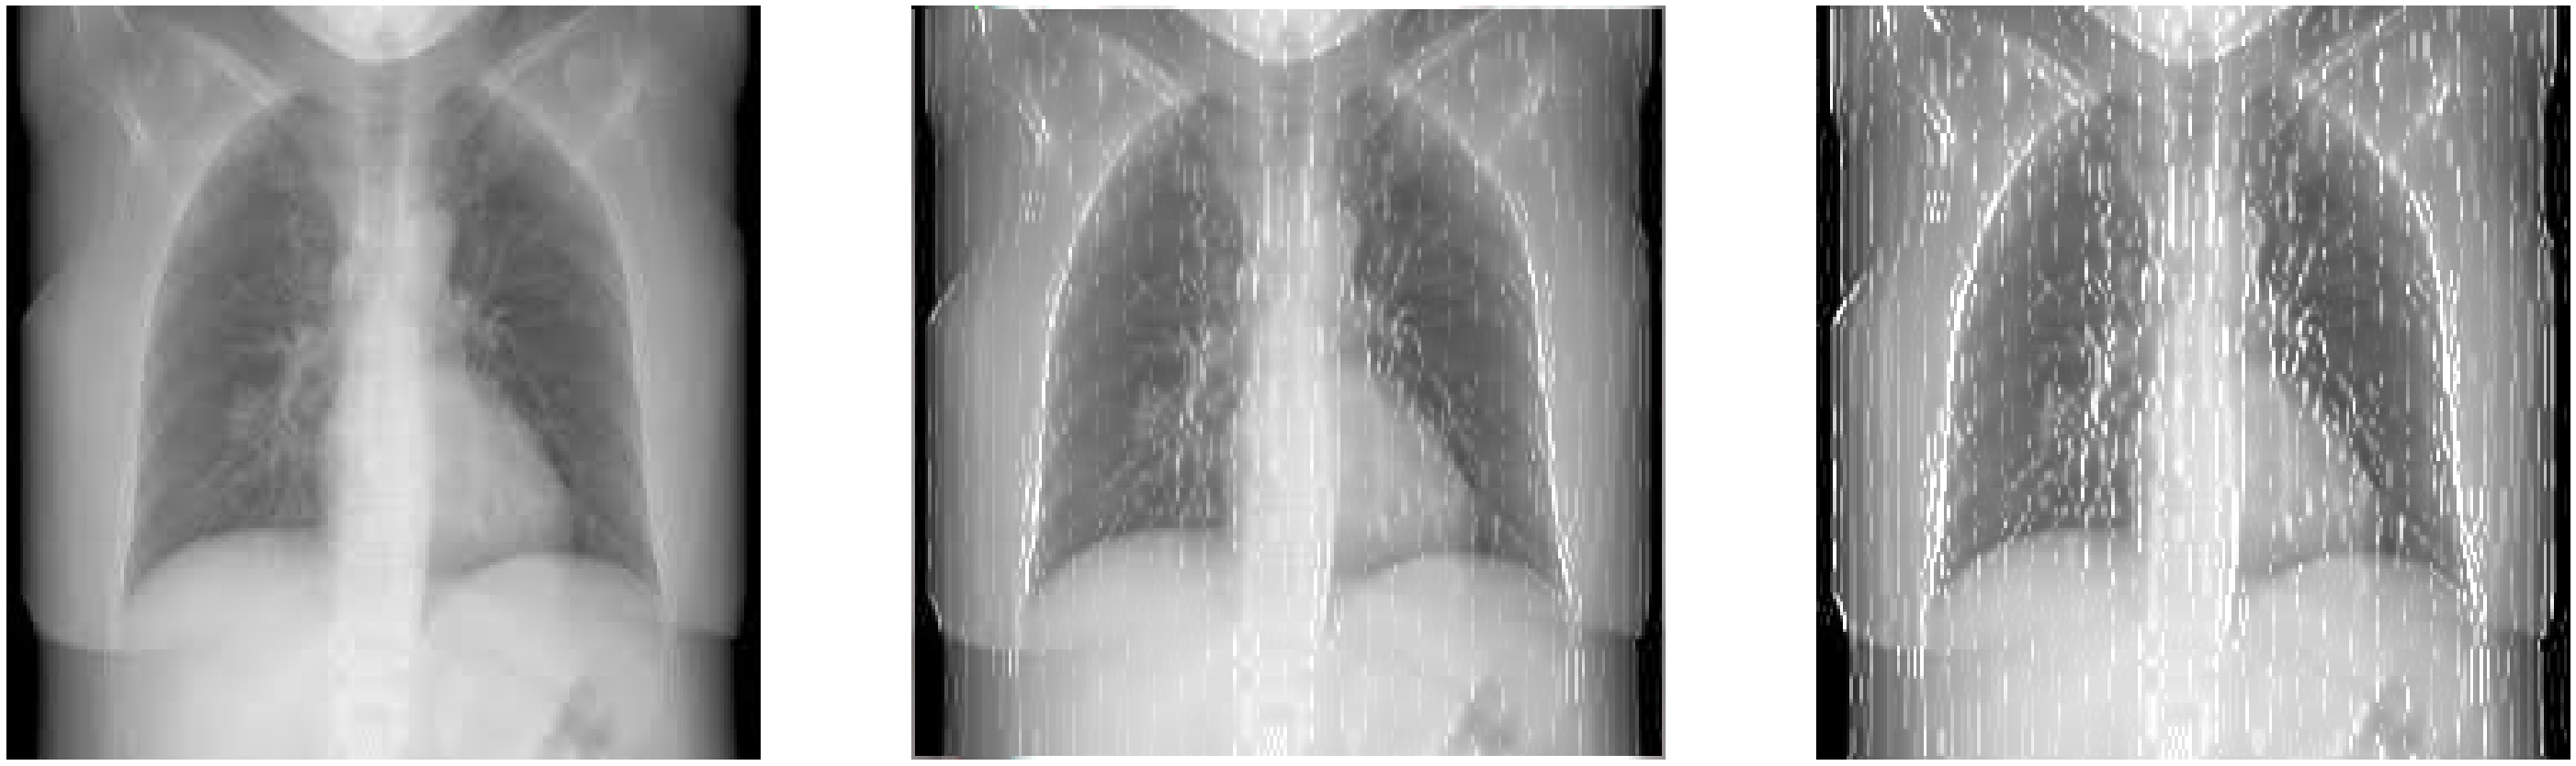

In [6]:
img = cv2.imread('/content/lung2.jpg')

mask1= np.array([
    [0, -1, 0], 
    [-1,  4, -1], 
    [0, -1, 0]
])
imgOut_mask1=laplacian_filter(img,mask1)
mask2= np.array([
    [-1, -1, -1], 
    [-1,  8, -1], 
    [-1, -1, -1]
])
imgOut_mask2=laplacian_filter(img,mask2)

plot_image([img,cv2.add(img,imgOut_mask1), cv2.add(img,imgOut_mask2)])
lap_4=cv2.filter2D(img ,-1, kernel = mask1)
lap_8=cv2.filter2D(img ,-1,kernel = mask2)

Edge Detction using Sobel Filters

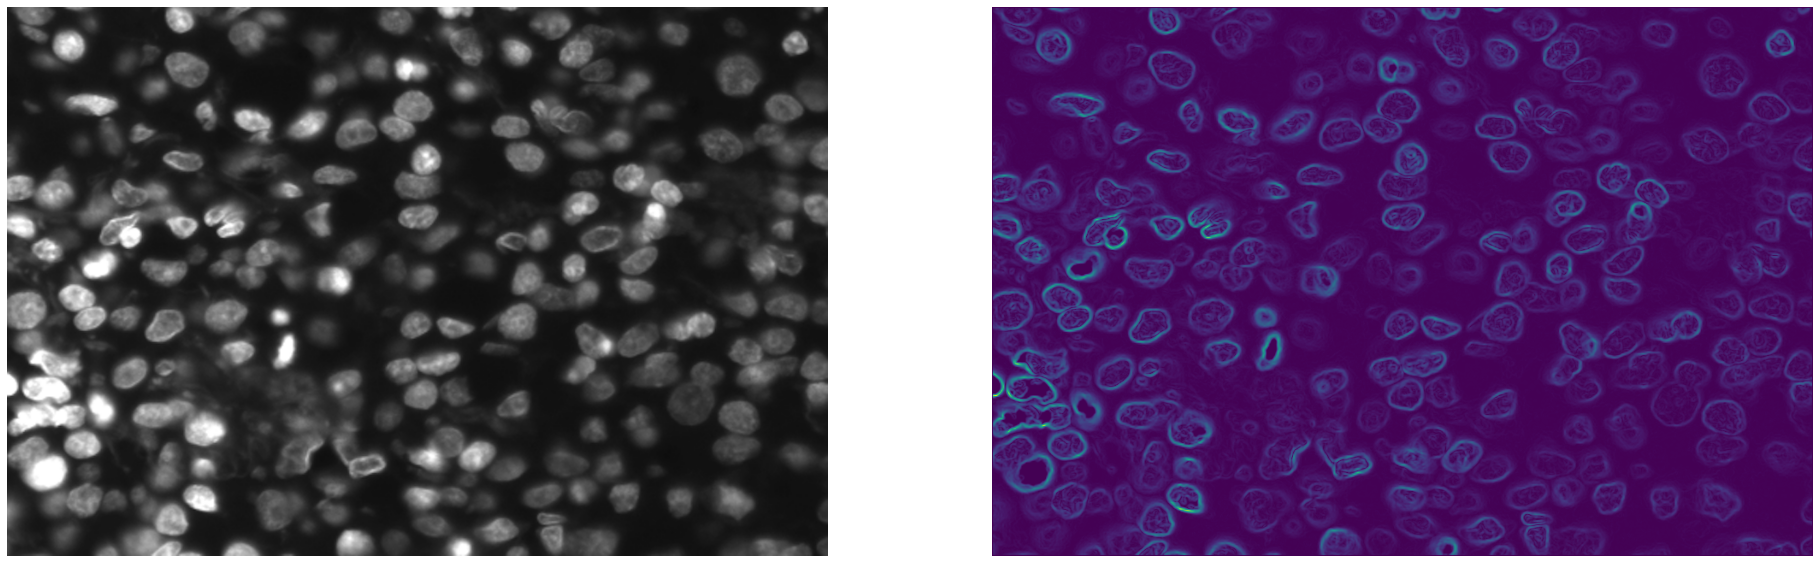

In [7]:
from matplotlib.image import imread
image_file = '/content/nucleus.png'
input_image = imread(image_file)  
 

grayscale_image =gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)  
sobel_filtered_image = np.zeros(shape=(rows, columns))  


for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  


plot_image([input_image,sobel_filtered_image])


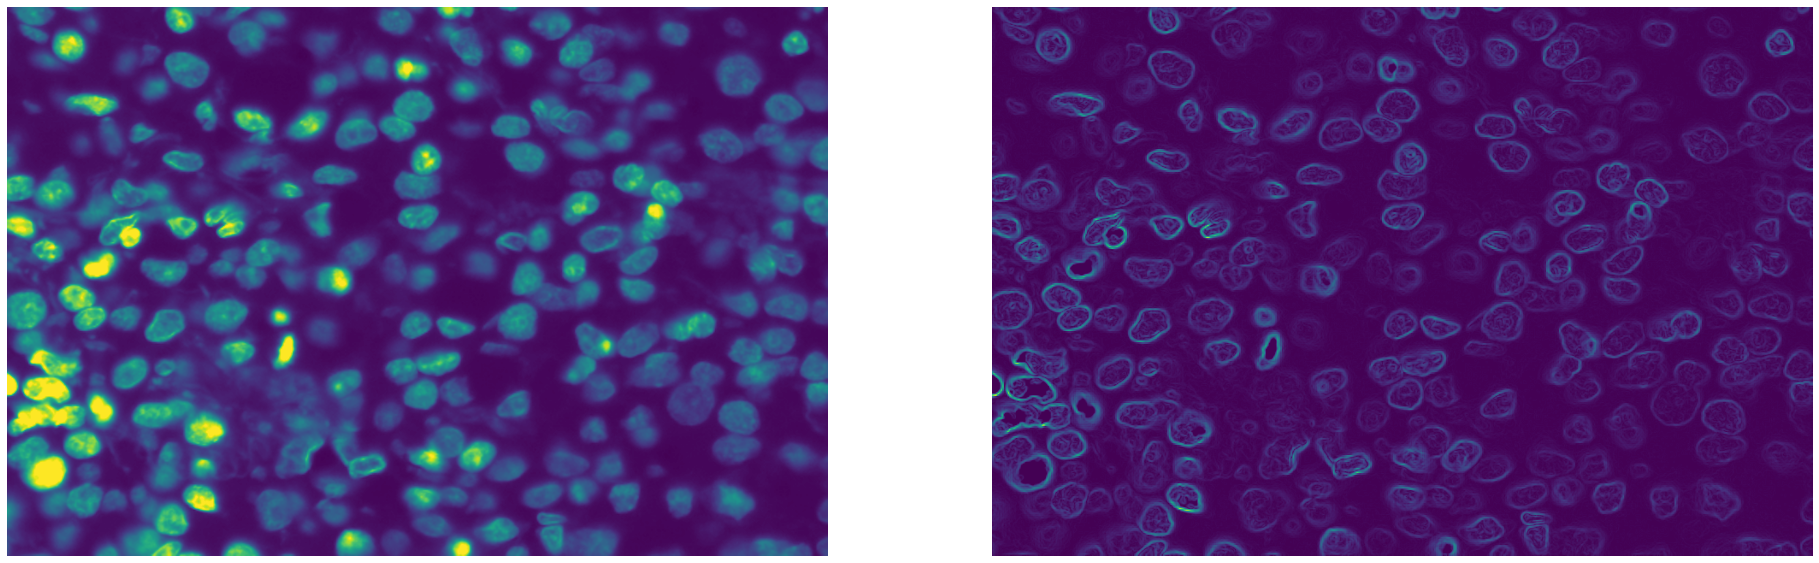

In [8]:
#Robert's Edge Detection
import cv2 
import numpy as np
from scipy import ndimage
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv2.imread("/content/nucleus.png",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2.imwrite("output.jpg",edged_img)

plot_image([img,edged_img])
